#### Задача 1
Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

a = 1.06 - средняя масса коробок (мат.ожидание)

s - среднее квадратическое отклонение

P(X > 1.1)- процент коробок, имееющих массу больше 1.1 кг

P(X < 1) = 0.05 - 5% коробок имеют массу меньше 1 кг

𝑃(−∞<𝑥<1)=Ф(1−1.06𝑠)−Ф(−∞−1.06𝑠)=0.05 Функция Лапласа

Ф(−0.06𝑠)−Ф(−∞)=0.05

0.5−Ф(0.06𝑠)=0.05

Ф(0.06𝑠)=0.45 По таблице значений функции Лапласа

0.06𝑠=1.6445

In [3]:
s = 0.06/1.6445 # a) Среднее квадратическое отклонение
s

0.036485253876558224

In [4]:
norm = stats.norm(loc=1.06, scale=s)
norm.cdf(1)

0.0500364821504924

Процент коробок, имеющих массу больше 1.1 кг.
$P(1.1<x<+\infty)=Ф(\infty−1.060.03648)−Ф(1.1−1.060.03648)=$

$=Ф(\infty)−Ф(0.040.03648)=0.5−Ф(1.0964)=0.5−0.3632=0.1368$

13,68% коробок, имеющих массу больше 1.1 кг

In [5]:
norm = stats.norm(loc=1.06, scale=s)
norm.cdf(1.1) 
print(norm.cdf(1.1)*100) #Процент коробок, масса которых меньше 1.1 кг

86.35335364693695


In [6]:
(1 - norm.cdf(1.1))*100 # Процент коробок, масса которых больше 1.1 кг

13.64664635306304

#### Задача 2
Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:

мат. ожидание равно (a + b) / 2,
дисперсия равна (b - a)^2 / 12.

In [10]:
n = 30
a = 12
b = 14
m = (a+b)/2 # 13 - мат.ожидание одной конфеты
d = ((b-a)**2)/12 # 1|3 - дисперсия одной конфеты

m,d

(13.0, 0.3333333333333333)

По ЦПТ масса коробки имеет нормальное распределение с параметрами:
$$M(X) = \mu = 30 \cdot m = 390, \:\: D(X) = \sigma^2 = 30 \cdot d = 10$$

In [11]:
mu = 390
sigma = np.sqrt(10)
norm  = stats.norm(loc=mu, scale=sigma)

In [14]:
#а) Вероятность, что масса всей коробки будет меньше 390 граммов.
norm.cdf(390)

0.5

In [15]:
# б) Вероятность, что масса всей коробки будет больше 395 граммов.
1-norm.cdf(395)

0.056923149003329065

In [16]:
# в) Вероятность, что масса всей коробки будет от 380 до 400 граммов.
norm.cdf(400)-norm.cdf(380)

0.9984345977419975

#### Задача № 3
Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

Для равномерного распределения в промежутке [a, b]:

Мат.ожидание $ M(X) = \mu = \dfrac{(a + b)}{ 2}$

Дисперсия $ D(X) = \sigma^2 = \dfrac{(b - a)^2}{12}$

Среднее квадратичное отклонение $ \sigma = \dfrac{(b-a)}{2\cdot \sqrt{3}}$

In [82]:
a = 0 
b = 1
mean = (a+b)/2
std = (b-a)/2*np.sqrt(3)

mean,std

(0.5, 0.8660254037844386)

In [83]:
uniform = stats.uniform(loc=mean, scale=std)

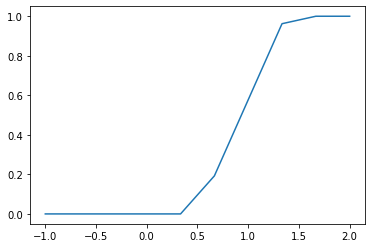

In [99]:
x = np.linspace(a-1,b+1,10)
cdf = uniform.cdf(x)
plt.plot(x, cdf)

In [95]:
n = 100
n_samples = 1000

In [96]:
samples = np.random.uniform(0, 1, size = (n, n_samples))
samples = samples.mean(axis = 0)

samples.shape

(1000,)

In [97]:
mu = mean
sigma = std/np.sqrt(n)

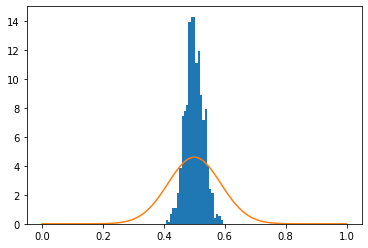

In [98]:
plt.hist(samples, density=True, bins=25)
x = np.linspace(a, b, 100)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x,y)

In [ ]:
# Должен ли пик функции плотности совпадать с пиком гистограммы по оси y?